## Importing Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn import metrics

## Data Preparation

In [2]:
train_df = pd.read_csv("C:/Users/Proye/Documents/File Latihan Python/Heart Attack Detector/train.csv")

In [3]:
train_df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
239,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
240,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
241,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
categorical=['sex','cp','fbs','restecg','exng','slp','caa','thall']
for n in categorical:
    print(np.sort(train_df[n].unique()))

[0 1]
[0 1 2 3]
[0 1]
[0 1 2]
[0 1]
[0 1 2]
[0 1 2 3 4]
[0 1 2 3]


In [5]:
train_df=train_df.drop(train_df[(train_df.thall == 0)].index)

## Data Exploration

([<matplotlib.patches.Wedge at 0x23c7fb17670>,
 [Text(0.192581824787761, 1.0830107297535958, "Doesn't Have Heart Attack"),
  Text(-0.1925817233889781, -1.0830107477844026, 'Have Heart Attack')],
 [Text(0.10504463170241508, 0.5907331253201431, '44.4%'),
  Text(-0.10504457639398805, -0.5907331351551287, '55.6%')])

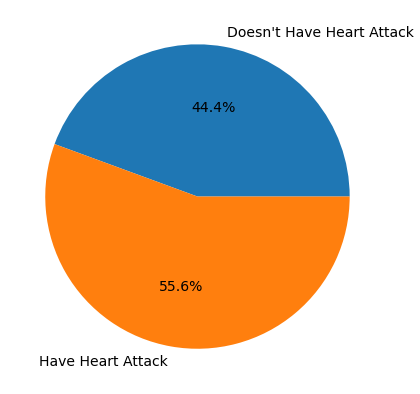

In [6]:
plt.figure(figsize=(7,7))

plt.pie(train_df.groupby(['output']).count()['age'],labels=["Doesn't Have Heart Attack",'Have Heart Attack'],
        textprops={'fontsize': 14},autopct='%1.1f%%')

Text(0.5, 1.0, 'Max Heart Rate Distribution')

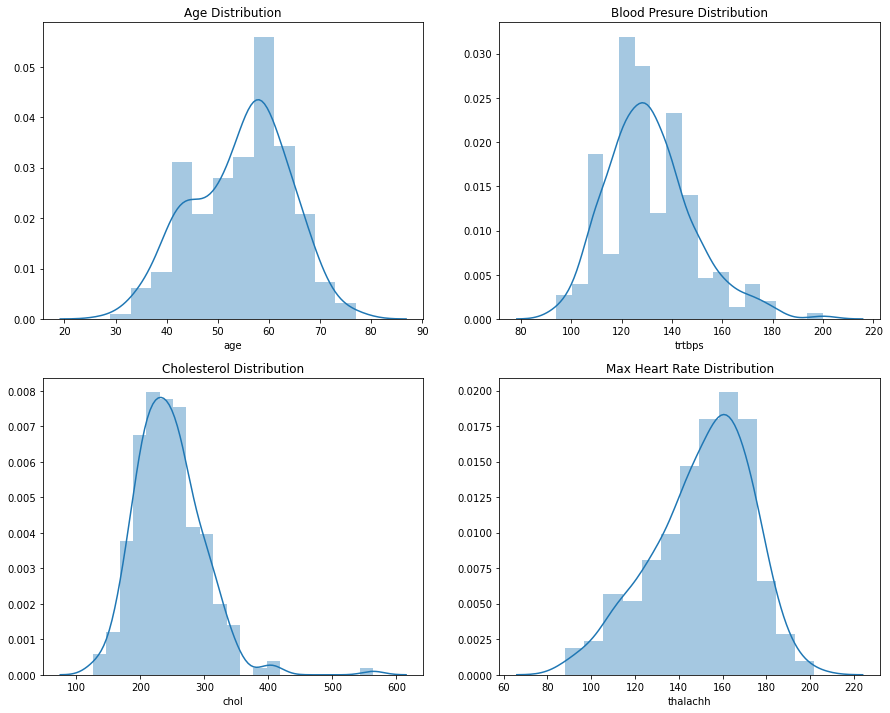

In [7]:
fig, axs = plt.subplots(2, 2,figsize=(15, 12))
sns.distplot(train_df.loc[:,'age'],norm_hist=True,ax=axs[0,0]).set_title('Age Distribution')

sns.distplot(train_df.loc[:,'trtbps'],norm_hist=True,ax=axs[0,1]).set_title('Blood Presure Distribution')

sns.distplot(train_df.loc[:,'chol'],norm_hist=True,ax=axs[1,0]).set_title('Cholesterol Distribution')

sns.distplot(train_df.loc[:,'thalachh'],norm_hist=True,ax=axs[1,1]).set_title('Max Heart Rate Distribution')


Text(0.5, 1.0, 'Heart Attack vs Sugar Level')

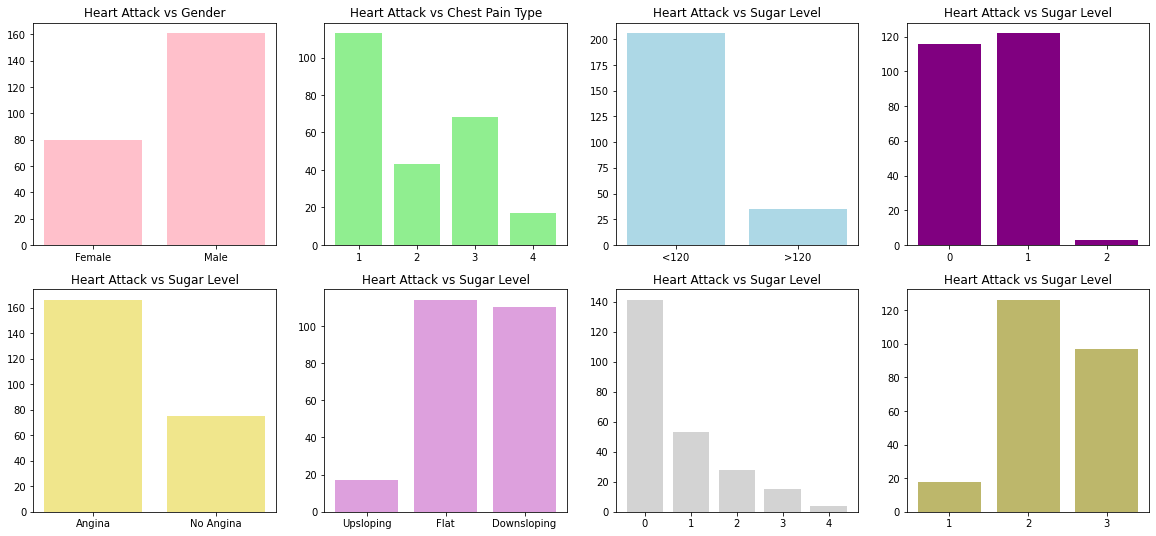

In [8]:
fig, axs = plt.subplots(2, 4,figsize=(20, 9))

axs[0,0].bar(["Female","Male"],train_df.groupby(['sex']).count()['output'],color='pink')
axs[0,0].set_title("Heart Attack vs Gender")

axs[0,1].bar(np.arange(1,5),train_df.groupby(['cp']).count()['output'],color='lightgreen')
axs[0,1].set_title("Heart Attack vs Chest Pain Type")

axs[0,2].bar(["<120",">120"],train_df.groupby(['fbs']).count()['output'],color='lightblue')
axs[0,2].set_title("Heart Attack vs Sugar Level")

axs[0,3].bar(np.arange(0,3).astype(str),train_df.groupby(['restecg']).count()['output'],color='purple')
axs[0,3].set_title("Heart Attack vs Sugar Level")

axs[1,0].bar(['Angina','No Angina'],train_df.groupby(['exng']).count()['output'],color='khaki')
axs[1,0].set_title("Heart Attack vs Sugar Level")

axs[1,1].bar(['Upsloping','Flat','Downsloping'],train_df.groupby(['slp']).count()['output'],color='plum')
axs[1,1].set_title("Heart Attack vs Sugar Level")

axs[1,2].bar(np.arange(0,5),train_df.groupby(['caa']).count()['output'],color='lightgrey')
axs[1,2].set_title("Heart Attack vs Sugar Level")

axs[1,3].bar(np.arange(1,4).astype(str),train_df.groupby(['thall']).count()['output'],color='darkkhaki')
axs[1,3].set_title("Heart Attack vs Sugar Level")

## Modeling

In [9]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X=train_df.drop(columns='output')
y=train_df.output

test=pd.read_csv("C:/Users/Proye/Documents/File Latihan Python/Heart Attack Detector/test.csv")

In [10]:
from sklearn.linear_model import Ridge

Ridge = make_pipeline(StandardScaler(), Ridge())
Ridge.fit(X,y)

print("Model Score = "+str(Ridge.score(X,y)))

Model Score = 0.5227895248567813


In [11]:
from sklearn.neighbors import KNeighborsClassifier

KN = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=2))
KN.fit(X,y)

print("Model Score = "+str(KN.score(X,y)))

Model Score = 0.8879668049792531


In [12]:
from sklearn.svm import SVC

SVM = make_pipeline(StandardScaler(), SVC(gamma='auto'))
SVM.fit(X, y)

print("Model Score = "+str(SVM.score(X,y)))

Model Score = 0.9294605809128631


In [13]:
from sklearn.linear_model import SGDClassifier

SGD = make_pipeline(StandardScaler(), SGDClassifier())
SGD.fit(X, y)

print("Model Score = "+str(SGD.score(X,y)))

Model Score = 0.8215767634854771


In [14]:
from sklearn.neural_network import MLPClassifier

MLP = MLPClassifier(random_state=0,max_iter=1000)
MLP.fit(X, y)

print("Model Score = "+str(MLP.score(X,y)))

Model Score = 0.8298755186721992


In [15]:
from sklearn.neural_network import MLPClassifier

MLP = make_pipeline(StandardScaler(), MLPClassifier(random_state=0,max_iter=1000))
MLP.fit(X, y)

print("Model Score = "+str(MLP.score(X,y)))

Model Score = 1.0


## Result & Conclussion

In [16]:
result=test
result['output']=MLP.predict(test)
result

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,38,1,3,120,231,0,1,182,1,3.8,1,0,3,1
1,39,1,2,140,321,0,0,182,0,0.0,2,0,2,1
2,40,1,3,140,199,0,1,178,1,1.4,2,0,3,1
3,41,0,1,105,198,0,1,168,0,0.0,2,1,2,1
4,42,1,0,140,226,0,1,178,0,0.0,2,0,2,1
5,43,1,0,150,247,0,1,171,0,1.5,2,0,2,1
6,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0
7,44,1,2,130,233,0,1,179,1,0.4,2,0,2,1
8,44,1,1,130,219,0,0,188,0,0.0,2,0,2,1
9,44,1,2,140,235,0,0,180,0,0.0,2,0,2,1


This model can be used to predict a person will have heart attack or not, based on these features and the train dataset. 

But in my opinion, the model need more train data